In [1]:
import os 
import re
import sys

import jieba
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
os.environ["CUDA_VISABLE_DEVICES"] = "0"

In [3]:
data_df = pd.read_csv("../data/95_baidu_seg.csv")

In [5]:
data_df.head()

,Unnamed: 0,label,content
0,0,高中 生物 分子与细胞 组成细胞的化学元素 组成细胞的化合物,菠菜 土壤 中 吸收 氮 元素 用来 合成 淀粉 纤维素 葡萄糖 核酸 蛋白质 麦芽糖 脂肪酸
1,1,高中 生物 稳态与环境 神经调节和体液调节的比较,下列 生物体 内 信息 传递 叙述 正确 下丘脑 分泌 促 甲状腺 激素 释放 激素 作用 ...
2,2,高中 生物 生物技术实践 生物工程技术,自然 菌样 筛选 理想 生产 菌种 步骤 采集 菌样 富集 培养 纯种 分离 性能 测定 不...
3,3,高中 生物 生物技术实践 生物技术在其他方面的应用 器官移植 复等位基因 胚胎移植 基因工程...,目前 精子 载体 法 逐渐 成为 具有 诱惑力 制备 转基因 动物 方法 方法 精子 外源 ...
4,4,高中 地理 宇宙中的地球 地球运动的地理意义,某人 想 普通 飞机 一年 中 连续 两次 生日 认为 应 穿越 赤道 两级 本初子午线 国...


In [7]:
data_df["label"] = data_df["label"].apply(lambda x: x.split())

In [8]:
data_df.head()

,Unnamed: 0,label,content
0,0,"[高中, 生物, 分子与细胞, 组成细胞的化学元素, 组成细胞的化合物]",菠菜 土壤 中 吸收 氮 元素 用来 合成 淀粉 纤维素 葡萄糖 核酸 蛋白质 麦芽糖 脂肪酸
1,1,"[高中, 生物, 稳态与环境, 神经调节和体液调节的比较]",下列 生物体 内 信息 传递 叙述 正确 下丘脑 分泌 促 甲状腺 激素 释放 激素 作用 ...
2,2,"[高中, 生物, 生物技术实践, 生物工程技术]",自然 菌样 筛选 理想 生产 菌种 步骤 采集 菌样 富集 培养 纯种 分离 性能 测定 不...
3,3,"[高中, 生物, 生物技术实践, 生物技术在其他方面的应用, 器官移植, 复等位基因, 胚胎...",目前 精子 载体 法 逐渐 成为 具有 诱惑力 制备 转基因 动物 方法 方法 精子 外源 ...
4,4,"[高中, 地理, 宇宙中的地球, 地球运动的地理意义]",某人 想 普通 飞机 一年 中 连续 两次 生日 认为 应 穿越 赤道 两级 本初子午线 国...


## 构建数据集

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
vocab_size = 30000
padding_size = 200

### 构建 x

In [11]:
text_preprocesser = Tokenizer(num_words=vocab_size, oov_token="<UNK>")
text_preprocesser.fit_on_texts(data_df["content"])

In [12]:
x = text_preprocesser.texts_to_sequences(data_df["content"])

In [14]:
x[0]

[3396, 402, 2, 495, 2481, 605, 1768, 107, 1002, 682, 359, 470, 55, 2290, 3863]

In [15]:
word_dict = text_preprocesser.word_index

In [16]:
x = pad_sequences(x, maxlen=padding_size, padding="post", truncating="post")

In [17]:
x[0].shape

(200,)

### 构建 y

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

In [20]:
mlb = MultiLabelBinarizer()

In [22]:
mlb = mlb.fit(data_df["label"])

In [23]:
mlb.classes_

array(['“重农抑商”政策', '不完全显性', '与细胞分裂有关的细胞器', '中央官制——三公九卿制', '中心体的结构和功能',
       '人体免疫系统在维持稳态中的作用', '人体水盐平衡调节', '人体的体温调节', '人口与城市', '人口增长与人口问题',
       '人口迁移与人口流动', '人工授精、试管婴儿等生殖技术', '伴性遗传', '体液免疫的概念和过程', '免疫系统的功能',
       '免疫系统的组成', '公民道德与伦理常识', '兴奋在神经元之间的传递', '兴奋在神经纤维上的传导', '内环境的稳态',
       '内质网的结构和功能', '农业区位因素', '减数分裂与有丝分裂的比较', '减数分裂的概念', '分子与细胞',
       '劳动就业与守法经营', '历史', '古代史', '器官移植', '地球与地图', '地球所处的宇宙环境',
       '地球的内部圈层结构及特点', '地球的外部圈层结构及特点', '地球运动的地理意义', '地球运动的基本形式', '地理',
       '垄断组织的出现', '培养基与无菌技术', '基因工程的原理及技术', '基因工程的概念', '基因的分离规律的实质及应用',
       '基因的自由组合规律的实质及应用', '复等位基因', '夏商两代的政治制度', '太阳对地球的影响', '宇宙中的地球',
       '工业区位因素', '拉马克的进化学说', '政治', '文艺的春天', '核糖体的结构和功能', '海峡两岸关系的发展',
       '液泡的结构和功能', '清末民主革命风潮', '溶酶体的结构和功能', '激素调节', '现代史', '现代生物技术专题',
       '生产活动与地域联系', '生命活动离不开细胞', '生态系统的营养结构', '生活中的法律常识', '生物', '生物工程技术',
       '生物性污染', '生物技术在其他方面的应用', '生物技术实践', '生物科学与社会', '皇帝制度',
       '社会主义市场经济的伦理要求', '社会主义是中国人民的历史性选择', '神经调节和体液调节的比较', '科学社会主义常识',
       '稳态与环境', '第三产业的兴起和“新

In [25]:
y = mlb.fit_transform(data_df["label"])

In [26]:
len(y[0])

95

In [27]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0])

### 数据集划分

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [30]:
print('len X_train: ', len(X_train))
print('len X_test: ', len(X_test))
print('len y_train: ', len(y_train))
print('len y_test: ', len(y_test))

len X_train:  18060
len X_test:  4516
len y_train:  18060
len y_test:  4516


## 模型训练

### 构建评估函数

In [31]:
import tensorflow.keras.backend as K

In [32]:
def micro_f1(y_true, y_pred):
    """
    F1 metric.
    
    Computes the micro_f1 and macro_f1, 
    metrics for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    
    """
    Micro_F1 metric.
    """
    precision = K.sum(true_positives) / (K.sum(predicted_positives) + K.epsilon())
    recall = K.sum(true_positives) / (K.sum(possible_positives) + K.epsilon())
    micro_f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    
    return micro_f1

In [33]:
def macro_f1(y_true, y_pred):
    """
    F1 metric.

    Computes the micro_f1 and macro_f1,
    metrics for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    """
    Macro_F1 metric.
    """
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    macro_f1 = K.mean(2 * precision * recall / (precision + recall + K.epsilon()))

    return macro_f1

### 参数设置

In [42]:
feature_size=padding_size
embed_size=300
num_classes=len(y[0])
filter_sizes='3,4,5'
dropout_rate=0.5
regularizers_lambda=0.01
learning_rate=0.01
batch_size=512

### 构建模型

In [34]:
import logging 

from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Flatten, concatenate, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from pprint import pprint

In [38]:
def TextCNN(max_sequence_length, max_token_num, embeding_dim, output_dim, model_img_path=None, embedding_matrix=None):
    """
    TextCNN: 
    1.embedding layers, 
    2.convolution layer, 
    3.max-pooling, 
    4.softmax layer. 
    """
    
    x_input = Input(shape=(max_sequence_length,))
    logging.info("x_input.shape: %s" % str(x_input.shape))
    
    if embedding_matrix is None:
        x_emb = Embedding(input_dim=max_token_num, output_dim=embeding_dim, input_length=max_sequence_length)(x_input)
    else:
        x_emb = Embedding(input_dim=max_token_num, output_dim=embeding_dim, input_length=max_sequence_length, 
                          weights=[embedding_matrix], trainable=True)(x_input)
        
    pool_output = []
    kernel_size = [2, 3, 4]
    for kernel_size in kernel_size:
        c = Conv1D(filters=2, kernel_size=kernel_size, strides=1)(x_emb)
        p = MaxPool1D(pool_size=int(c.shape[1]))(c)
        pool_output.append(p)
        
        logging.info("kernel_size: %s \t c.shape: %s \t p.shape: %s" % (kernel_size, str(c.shape), str(p.shape)))
        
    pool_output = concatenate([p for p in pool_output])
    logging.info("pool_output.shape: %s" % str(pool_output.shape))
    
    x_flatten = Flatten()(pool_output)
    y = Dense(output_dim, activation="sigmoid")(x_flatten)
    
    logging.info("y.shape: %s \n" % str(y.shape))
    
    model = Model([x_input], outputs=[y])
    
    if model_img_path:
        plot_model(model, to_file=model_img_path, show_shapes=True, show_layer_names=False)
    model.summary()
    
    return model

### 训练模型

In [39]:
model = TextCNN(max_sequence_length=feature_size, max_token_num=vocab_size, embeding_dim=embed_size, output_dim=num_classes)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 300)     9000000     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 199, 2)       1202        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 198, 2)       1802        embedding_1[0][0]                
____________________________________________________________________________________________

In [40]:
model.compile(tf.optimizers.Adam(learning_rate=learning_rate), 
              loss='binary_crossentropy',
              metrics=[micro_f1, macro_f1])

In [44]:
epochs = 30

In [45]:
print('Train...')
early_stopping = EarlyStopping(monitor='val_micro_f1', patience=10, mode='max')

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          workers=32,
          use_multiprocessing=True,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Train...
Train on 18060 samples, validate on 4516 samples
Epoch 1/30
18060/18060 [==============================] - 4s 206us/sample - loss: 0.0286 - micro_f1: 0.9148 - macro_f1: 0.7716 - val_loss: 0.0697 - val_micro_f1: 0.8434 - val_macro_f1: 0.6430
Epoch 2/30
18060/18060 [==============================] - 4s 205us/sample - loss: 0.0275 - micro_f1: 0.9188 - macro_f1: 0.7828 - val_loss: 0.0719 - val_micro_f1: 0.8420 - val_macro_f1: 0.6413
Epoch 3/30
18060/18060 [==============================] - 4s 205us/sample - loss: 0.0265 - micro_f1: 0.9209 - macro_f1: 0.7855 - val_loss: 0.0720 - val_micro_f1: 0.8468 - val_macro_f1: 0.6536
Epoch 4/30
18060/18060 [==============================] - 4s 204us/sample - loss: 0.0263 - micro_f1: 0.9219 - macro_f1: 0.7890 - val_loss: 0.0734 - val_micro_f1: 0.8434 - val_macro_f1: 0.6458
Epoch 5/30
18060/18060 [==============================] - 4s 207us/sample - loss: 0.0257 - micro_f1: 0.9236 - macro_f1: 0.7973 - val_loss: 0.0741 - val_micro_f1: 0.8423 - val

## 画图

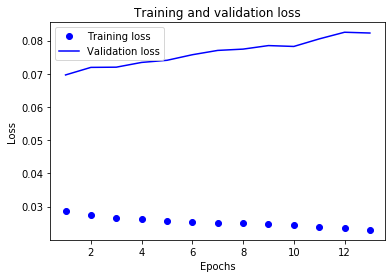

In [46]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

micro_f1 = history_dict['micro_f1']
val_micro_f1 = history_dict['val_micro_f1']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(micro_f1) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

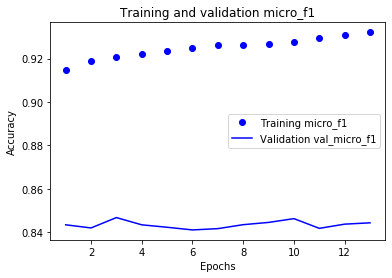

In [47]:
plt.clf()   # 清除数字

plt.plot(epochs, micro_f1, 'bo', label='Training micro_f1')
plt.plot(epochs, val_micro_f1, 'b', label='Validation val_micro_f1')
plt.title('Training and validation micro_f1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### sklearn 评估

In [53]:
from sklearn.metrics import f1_score, accuracy_score

In [54]:
f1_score(y_test, y_pred, average="samples")

0.8345346731562143

In [61]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    

In [62]:
accuracy_score(y_test, y_pred, normalize=False)

1518

## 预测

In [48]:
y_pred = model.predict(X_test)

In [51]:
y_pred[0].shape

(95,)

In [52]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [55]:
mlb.inverse_transform(y_pred)

[('地理', '太阳对地球的影响', '宇宙中的地球', '高中'),
 ('公民道德与伦理常识', '政治', '社会主义市场经济的伦理要求', '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '伴性遗传',
  '基因的分离规律的实质及应用',
  '生物',
  '生物性污染',
  '生物科学与社会',
  '遗传的分子基础',
  '遗传的细胞基础',
  '避孕的原理和方法',
  '高中'),
 ('地球运动的基本形式', '地理', '宇宙中的地球', '高中'),
 ('生物', '生物工程技术', '生物技术实践', '高中'),
 ('政治', '社会主义是中国人民的历史性选择', '科学社会主义常识', '高中'),
 ('公民道德与伦理常识', '劳动就业与守法经营', '政治', '社会主义市场经济的伦理要求', '高中'),
 ('分子与细胞', '生物', '组成细胞的化合物', '组成细胞的化学元素', '高中'),
 ('人口与城市', '人口迁移与人口流动', '地理', '高中'),
 ('生物', '生物技术在其他方面的应用', '高中'),
 ('分子与细胞', '生物', '组成细胞的化合物', '组成细胞的化学元素', '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '生物',
  '生物性污染',
  '生物科学与社会',
  '遗传的分子基础',
  '遗传的细胞基础',
  '避孕的原理和方法',
  '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '减数分裂与有丝分裂的比较',
  '减数分裂的概念',
  '生物',
  '生物性污染',
  '生物科学与社会',
  '避孕的原理和方法',
  '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '减数分裂与有丝分裂的比较',
  '生物',
  '生物性污染',
  '生物科学与社会',
  '避孕的原理和方法',
  '高中'),
 ('激素调节', '生物', '稳态与环境', '高中'),
 ('地球的内部圈层结构及特点', '地球的外部圈层结构及特点', '地理', '宇宙中的地球', '高中'),
 ('人体免疫系统在维持稳态中的作用',
  '体液免疫的概念和过程',
  '免疫系统的功能',
  '免疫系

In [59]:
mlb.inverse_transform(y_test)

[('地理', '太阳对地球的影响', '宇宙中的地球', '高中'),
 ('公民道德与伦理常识', '政治', '社会主义市场经济的伦理要求', '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '基因的自由组合规律的实质及应用',
  '拉马克的进化学说',
  '生物',
  '生物性污染',
  '生物科学与社会',
  '遗传的分子基础',
  '遗传的细胞基础',
  '避孕的原理和方法',
  '高中'),
 ('地球运动的基本形式', '地理', '宇宙中的地球', '高中'),
 ('生物', '生物工程技术', '生物科学与社会', '高中'),
 ('政治', '社会主义是中国人民的历史性选择', '科学社会主义常识', '高中'),
 ('公民道德与伦理常识', '劳动就业与守法经营', '政治', '社会主义市场经济的伦理要求', '高中'),
 ('生物', '稳态与环境', '组成细胞的化合物', '组成细胞的化学元素', '细胞大小与物质运输的关系', '高中'),
 ('人口与城市', '人口迁移与人口流动', '地理', '高中'),
 ('现代生物技术专题', '生物', '生物技术在其他方面的应用', '高中'),
 ('分子与细胞', '生物', '组成细胞的化合物', '组成细胞的化学元素', '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '生物',
  '生物性污染',
  '生物科学与社会',
  '遗传的分子基础',
  '遗传的细胞基础',
  '避孕的原理和方法',
  '高中'),
 ('人工授精、试管婴儿等生殖技术',
  '减数分裂与有丝分裂的比较',
  '拉马克的进化学说',
  '生物',
  '生物性污染',
  '遗传与进化',
  '避孕的原理和方法',
  '高中'),
 ('人工授精、试管婴儿等生殖技术', '减数分裂与有丝分裂的比较', '生物', '生物性污染', '遗传与进化', '避孕的原理和方法', '高中'),
 ('激素调节', '生物', '稳态与环境', '高中'),
 ('地球的内部圈层结构及特点', '地球的外部圈层结构及特点', '地理', '宇宙中的地球', '高中'),
 ('人体免疫系统在维持稳态中的作用',
  '体液免疫的概念和过程',